In [14]:
import pickle

import numpy as np
import yaml
from nuance import Nuance
from nuance.kernels import rotation
from nuance import utils
import matplotlib.pyplot as plt

target = 153193474

gp_params = yaml.full_load(open(f"../data/{target}/gp.yaml", "r"))
data = pickle.load(open(f"../data/{target}/cleaned.fluxes", "rb"))
info = yaml.safe_load(open(f"../data/{target}/info.yaml", "r"))
periods = np.load(f"../data/{target}/periods.npy")
fresh_search = yaml.safe_load(open(f"../data/{target}/fresh_search.yaml", "r"))

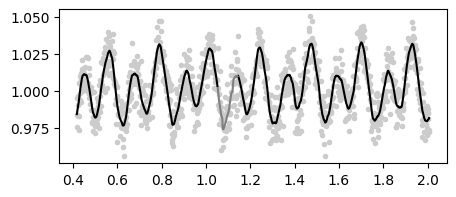

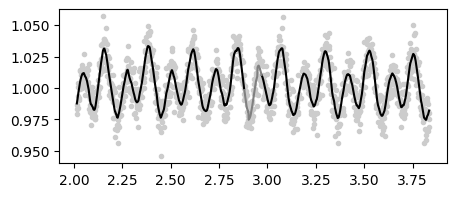

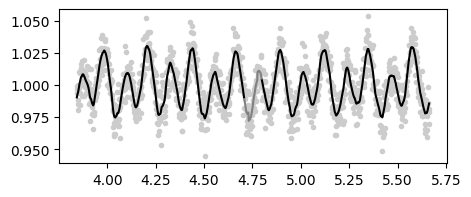

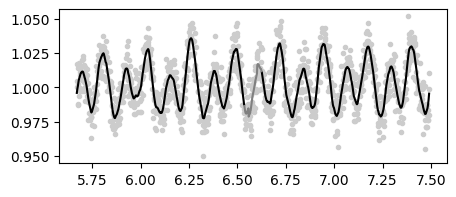

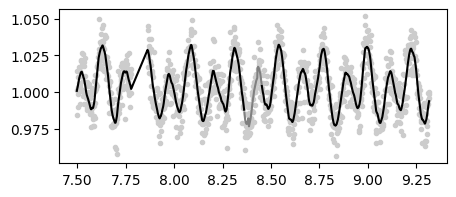

In [15]:
build_gp, _ = rotation()
gp = build_gp(gp_params, data["time"])
nu = Nuance(data["time"], data["flux"], gp=gp)
t0, D, period = fresh_search["t0"], fresh_search["duration"], fresh_search["period"]
found_t0s = data["time"][np.flatnonzero(np.abs(utils.phase(data["time"], t0, period)) < 1/24/60)]
linear, astro, noise = nu.models(t0, D, period)

for t in found_t0s[0:5]:
    mask = np.abs(data["time"] - t) < 20*D
    transit_mask = np.abs(utils.phase(data["time"], t, period)) < D
    model_without_transit = np.array(linear + noise)
    model_without_transit[transit_mask] = np.nan
    model_with_transit = np.array(linear + noise + astro)
    model_with_transit[~transit_mask] = np.nan
    plt.figure(figsize=(5, 2))
    plt.plot(data["time"][mask], data["flux"][mask], ".", c="0.8")
    plt.plot(data["time"][mask], model_without_transit[mask], c="k")
    plt.plot(data["time"][mask], model_with_transit[mask], c="grey")